In [3]:
import numpy as np
#import quaternion

import numpy as np
import pandas as pd
import scipy
from scipy.stats import t
import math
import ast
from scipy.spatial.transform import Rotation

import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave



def simpleAngle(sp, vector):
    
    surface_points = np.array(sp)
    dist = surface_points[0][2]
    
    
    
    if vector[2] <= 0:  # look to the side or backwards
        return False
    
    a = dist / vector[2]
    
    y_max = max(surface_points[:,1])
    y_min = min(surface_points[:,1])
    
    
    x_max = max(surface_points[:,0])
    x_min = min(surface_points[:,0])
    
    #print(surface_points[:,1])
    
    in_x = (a*vector[0] < x_max) & (a*vector[0] > x_min)
    
    in_y = (a*vector[1] < y_max) & (a*vector[1] > y_min)
    
    return in_x & in_y
    


def complexAngle(HMDPosition, HMDRotation, offset, sp, v): # what about HMDRotation?
    
    q = np.array(HMDRotation)
    rotation = Rotation.from_quat(q)
    
    vector = rotation.apply(v)
    
    surface_points = np.array(sp) - np.array(HMDPosition)
    dist = surface_points[0][2]
    
    
    
    if vector[2] <= 0:  # look to the side or backwards
        return False
    
    a = dist / vector[2]
    
    y_max = max(surface_points[:,1])
    y_min = min(surface_points[:,1])
    
    
    x_max = max(surface_points[:,0])
    x_min = min(surface_points[:,0])
    
    #print(surface_points[:,1])
    
    # find intersection point
    
    intersection = np.array(a*vector) - offset
    
    
    
    in_x = (intersection[0] < x_max) & (a*vector[0] > x_min)
    
    in_y = (intersection[1] < y_max) & (a*vector[1] > y_min)
    
    
    
    return (in_x & in_y), intersection


    
    

C:\Users\labru\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [375]:
# Example usage
surface_points = [ [-1, 1, 1], [1, 1, 1], [1, -1, 1], [-1, -1, 1] ]
vector = [0, 0, 1]

result = line_intersects_surface(surface_points, vector)
print("OLD: Does the line intersect the surface?", result)


print("SimpleAngle: Does the line intersect the surface?", simpleAngle(surface_points, vector))

#print(np.array(surface_points) + np.array([1, 1, 1]))

OLD: Does the line intersect the surface? True
SimpleAngle: Does the line intersect the surface? True


In [4]:
# Coordinates for categories
humanoids_points = [[-32.4, 24.5, 105], [-3.5, 24.5, 105], [-3.5, 5.5, 105], [-32.4, 5.5, 105]]
things_points = [[3.5, 24.5, 105], [32.4, 24.5, 105], [32.4, 5.5, 105], [3.5, 5.5, 105]]
vehicles_points = [[-32.4, -1.4, 105], [-3.5, -1.4, 105], [-3.5, -20.3, 105], [-32.4, -20.3, 105]]
animals_points = [[3.5, -1.4, 105], [32.4, -1.4, 105], [32.4, -20.3, 105], [3.5, -20.3, 105]]

# partipants
gaze_p1 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Gaze-participant1-2024-12-17-14-37.csv"
log_p1 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Study-Logs-participant1-2024-12-17-14-37.csv"

gaze_p2 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Gaze-participant2-2024-12-18-16-11.csv"
log_p2 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Study-Logs-participant2-2024-12-18-16-11.csv"

gaze_p3 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Gaze-participant3-2024-12-19-17-26.csv"
log_p3 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Study-Logs-participant3-2024-12-19-17-26.csv"

gaze_p4 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Gaze-participant4-2024-12-20-11-17.csv"
log_p4 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Study-Logs-participant4-2024-12-20-11-17.csv"

gaze_p5 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Gaze-participant5-2024-12-20-14-10.csv"
log_p5 = r"C:\Users\labru\Documents\Uni\IT_and_Cognition\Year_2\CCS3\Project_CCS3\DATA\Logs\Study-Logs-participant5-2024-12-20-14-10.csv"



# set participant folders
participant = 1
currentP = [gaze_p1, log_p1]



#print("DIRTY GAZE DATA")
# get gaze data
dirty_gaze_df = pd.read_csv(currentP[0], delimiter=";")

# drops rows where focus stability is zero
dirty_gaze_df.drop(np.where(dirty_gaze_df['FocusStability']==0)[0]) 




print("CLEAN GAZE DATA")
good_indices = np.unique(dirty_gaze_df['U_Frame'], return_index=True)


gaze_df = dirty_gaze_df.loc[good_indices[1]]

# drops rows where focus stability is zero
gaze_df = gaze_df[(gaze_df['FocusStability']!=0.000000)]

display(gaze_df)


print("STUDY LOG DATA")
# get participant-log data
log_df = pd.read_csv(currentP[1], delimiter=";")
display(log_df)



CLEAN GAZE DATA


,U_Frame,CaptureTime,LogTime,HMDPosition,HMDRotation,GazeStatus,CombinedGazeForward,CombinedGazePosition,InterPupillaryDistanceInMM,LeftEyeStatus,...,LeftIrisDiameterInMM,RightEyeStatus,RightEyeForward,RightEyePosition,RightPupilIrisDiameterRatio,RightPupilDiameterInMM,RightIrisDiameterInMM,FocusDistance,FocusStability,FixationPoint
0,1,1001571145440664914,63870043050122,"(-0.320494, 1.251129, 0.323498)","(0.053661, 0.042035, 0.000403, 0.997674)",VALID,"(-0.025381, 0.184586, 0.982489)","(0.000000, 0.000000, 0.000000)",67.025,VALID,...,12.71477,VALID,"(-0.056735, 0.194148, 0.979330)","(0.033419, 0.000000, 0.000000)",0.313400,4.012478,12.80306,0.970021,0.525013,"(-0.403027, 2.113415, 1.149526)"
98,2,1001571145930861354,63870043050179,"(-0.320494, 1.251129, 0.323498)","(0.053661, 0.042035, 0.000403, 0.997674)",VALID,"(-0.043091, 0.180575, 0.982617)","(0.000000, 0.000000, 0.000000)",67.025,VALID,...,12.71477,VALID,"(-0.080985, 0.189466, 0.978542)","(0.033419, 0.000000, 0.000000)",0.289770,3.709942,12.80306,0.832864,0.594000,"(-0.393830, 2.109072, 1.200858)"
110,3,1001571147951602365,63870043052632,"(-0.320210, 1.254306, 0.320762)","(0.044680, 0.049527, -0.007050, 0.997748)",VALID,"(0.000166, 0.105018, 0.994470)","(0.000000, 0.000000, 0.000000)",67.025,VALID,...,12.71477,VALID,"(-0.025225, 0.112900, 0.993286)","(0.033419, 0.000000, 0.000000)",0.376320,4.818039,12.80306,1.198160,0.975233,"(-0.397497, 2.049218, 0.674072)"
310,6,1001571148951985468,63870043053155,"(-0.318138, 1.256675, 0.319568)","(0.038240, 0.055401, -0.004882, 0.997720)",VALID,"(-0.140381, 0.162890, 0.976606)","(0.000000, 0.000000, 0.000000)",67.025,VALID,...,12.71477,VALID,"(-0.151197, 0.161019, 0.975301)","(0.033419, 0.000000, 0.000000)",0.309599,3.963811,12.80306,2.000000,0.589942,"(-0.491916, 2.233238, 2.310892)"
312,7,1001571148961994292,63870043053166,"(-0.318239, 1.256697, 0.319558)","(0.038123, 0.054386, -0.004669, 0.997781)",VALID,"(-0.139990, 0.163397, 0.976578)","(0.000000, 0.000000, 0.000000)",67.025,VALID,...,12.71477,VALID,"(-0.150936, 0.161243, 0.975305)","(0.033419, 0.000000, 0.000000)",0.306818,3.928204,12.80306,2.000000,0.609548,"(-0.495600, 2.235664, 2.310559)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219710,83306,1001572251432016512,63870044155636,"(-0.327033, 1.242356, 0.354564)","(0.007328, -0.008693, -0.011062, 0.999874)",VALID,"(0.066333, -0.055830, 0.996234)","(0.000000, 0.000000, 0.000000)",66.625,VALID,...,12.53512,VALID,"(0.061691, -0.056808, 0.996477)","(0.033221, 0.000000, 0.000000)",0.356486,4.554230,12.77533,2.000000,0.844408,"(-0.346407, 1.900361, 2.347224)"
219713,83307,1001572251447021221,63870044155651,"(-0.327035, 1.242279, 0.354706)","(0.007892, -0.008613, -0.011135, 0.999870)",VALID,"(0.066502, -0.054705, 0.996286)","(0.000000, 0.000000, 0.000000)",66.625,VALID,...,12.53512,VALID,"(0.062193, -0.054890, 0.996554)","(0.033221, 0.000000, 0.000000)",0.357549,4.567805,12.77533,2.000000,0.815330,"(-0.346183, 1.900470, 2.347368)"
219716,83308,1001572251462022539,63870044155662,"(-0.327014, 1.242169, 0.354875)","(0.008460, -0.008593, -0.011195, 0.999865)",VALID,"(0.066488, -0.053286, 0.996363)","(0.000000, 0.000000, 0.000000)",66.625,VALID,...,12.53512,VALID,"(0.062273, -0.052946, 0.996654)","(0.033221, 0.000000, 0.000000)",0.357610,4.568587,12.77533,2.000000,0.781556,"(-0.346236, 1.900531, 2.347553)"
219718,83309,1001572251472028011,63870044155676,"(-0.326994, 1.242086, 0.355027)","(0.009003, -0.008561, -0.011191, 0.999860)",VALID,"(0.066214, -0.052233, 0.996437)","(0.000000, 0.000000, 0.000000)",66.625,VALID,...,12.53512,VALID,"(0.062055, -0.051865, 0.996724)","(0.033221, 0.000000, 0.000000)",0.357640,4.568969,12.77533,2.000000,0.715430,"(-0.347080, 1.900821, 2.347772)"


STUDY LOG DATA


,U_Frame,LogTime,Encoding_phase,Recall_phase,ConditionNumber,Condition_name,Category,Statement_ID,Correctness,Answer,ValidationTrackerAbsolute,ValidationTrackerProcent
0,1,63870043050118,False,False,0,CentralFixation,None,None,None,None,None,None
1,2,63870043050179,False,False,0,CentralFixation,None,None,None,None,0,1
2,3,63870043052632,False,False,0,CentralFixation,None,None,None,None,0,1
3,4,63870043053057,False,False,0,CentralFixation,None,None,None,None,0,1
4,5,63870043053140,False,False,0,CentralFixation,None,None,None,None,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
82916,82917,63870044150602,False,True,1,FreeLooking,ANIMALS,0,True,None,None,None
82917,82918,63870044150624,False,True,1,FreeLooking,ANIMALS,0,True,None,None,None
82918,82919,63870044150647,False,True,1,FreeLooking,ANIMALS,0,True,None,None,None
82919,82920,63870044150659,False,True,1,FreeLooking,ANIMALS,0,True,True,None,None


In [5]:
# Recall_phase == "True" && Condition_name == "CentralFixation"
log_df_central = log_df[(log_df['Recall_phase']==True) & (log_df['Condition_name'] == "CentralFixation")]
#display(log_df_central)

log_df_free = log_df[(log_df['Recall_phase']==True) & (log_df['Condition_name'] == "FreeLooking")]
#display(log_df_free)

cats = ['HUMANOIDS', 'THINGS', 'VEHICLES', 'ANIMALS']
  

    
cats_LogTimes = []
for cat in cats:
    LogTimes = log_df_free[log_df_free['Category']==cat]['LogTime'].to_list() # free_looking, as free gaze is interesting
    #LogTimes = log_df_central[log_df_central['Category']==cat]['LogTime'].to_list()
    
    cats_LogTimes.append([min(LogTimes), max(LogTimes)])
    


# Get coordinates from gaze-data that corresponds to one category in Free-Looking.
def get_stuff(name, cat):
    
    if cat >= 0:
        str_versions = gaze_df[((gaze_df['LogTime'] >= cats_LogTimes[cat][0]) & (gaze_df['LogTime'] <= cats_LogTimes[cat][1]))][name].to_list()
    elif cat==-1:
        cf_min, cf_max = min(central_fix_LogTime), max(central_fix_LogTime)
        str_versions = gaze_df[((gaze_df['LogTime'] >= cf_min) & (gaze_df['LogTime'] <= cf_max))][name].to_list()
    elif cat==-2:
        fl_min, fl_max = min(free_LogTime), max(free_LogTime)
        str_versions = gaze_df[((gaze_df['LogTime'] >= fl_min) & (gaze_df['LogTime'] <= fl_max))][name].to_list()        
    
    #print(str_versions)
    #return [list(eval(elm)) for elm in str_versions]
    
    # Filter and convert valid strings to lists
    valid_results = []
    for elm in str_versions:
        if isinstance(elm, str):  # Ensure it is a string
            try:
                valid_results.append(list(eval(elm)))
            except (SyntaxError, NameError):  # Catch eval errors
                print(f"Skipping invalid entry: {elm}")
        elif isinstance(elm, float) and not math.isnan(elm):  # Handle unexpected float
            print(f"Skipping unexpected numeric entry: {elm}")
    
    return valid_results


central_fix_LogTime = log_df_central['LogTime'].to_list()
cf_gaze = get_stuff('CombinedGazeForward', -1)
cf_pos =  get_stuff('HMDPosition', -1)
cf_rot =  get_stuff('HMDRotation', -1)


free_LogTime = log_df_free['LogTime'].to_list()
fl_gaze = get_stuff('CombinedGazeForward', -2)
fl_pos =  get_stuff('HMDPosition', -2)
fl_rot =  get_stuff('HMDRotation', -2)


hum_gaze = get_stuff('CombinedGazeForward', 0)
hum_pos =  get_stuff('HMDPosition', 0)
hum_rot =  get_stuff('HMDRotation', 0)

thi_gaze = get_stuff('CombinedGazeForward', 1)
thi_pos = get_stuff('HMDPosition', 1)
thi_rot =  get_stuff('HMDRotation', 1)

veh_gaze = get_stuff('CombinedGazeForward', 2)
veh_pos = get_stuff('HMDPosition', 2)
veh_rot =  get_stuff('HMDRotation', 2)

ani_gaze = get_stuff('CombinedGazeForward', 3)
ani_pos = get_stuff('HMDPosition', 3)
ani_rot =  get_stuff('HMDRotation', 3)


#print(hum_gaze)


In [6]:
test_points = [[-32.4, 24.5, 105.], [32.4, 24.5, 105.], [32.4, -20.3, 105.], [-32.4, -20.3, 105.]] # test points, covers whole grid

def find_Looks_to_Nothing(points, gaze, pos, rot, offset):

    # Take "CombinedGazeForward" as vector. For each vector, run line_intersects_surface on [category]_points and that vector.
    is_LtN = [] # LtN is Look to Nothing

    coord = np.array([[0.,0.,0.]])

    #humanoids_points = [[-32.4, 24.5, 105], [-3.5, 24.5, 105], [-3.5, 5.5, 105], [-32.4, 5.5, 105]]
    #things_points = [[3.5, 24.5, 105], [32.4, 24.5, 105], [32.4, 5.5, 105], [3.5, 5.5, 105]]
    #vehicles_points = [[-32.4, -1.4, 105], [-3.5, -1.4, 105], [-3.5, -20.3, 105], [-32.4, -20.3, 105]]
    #animals_points = [[3.5, -1.4, 105], [32.4, -1.4, 105], [32.4, -20.3, 105], [3.5, -20.3, 105]]

    i = 0
    for vector in gaze:
        #is_LtN.append(line_intersects_surface(points, vector))
        #is_LtN.append(simpleAngle(humanoids_points, vector))
        
        res = complexAngle(pos[i], rot[i], offset, points, vector)
        if res == False:
            continue
        is_LtN.append(res[0])

        coord = np.append(coord, np.array([res[1]]), axis=0)

        i+=1
    
    return is_LtN, coord

#center_coords = complexAngle(cf_pos[i], cf_rot[i], [0., 0., 0.], test_points, vector)
center_coords = find_Looks_to_Nothing(test_points, cf_gaze, cf_pos, cf_rot, [0., 0., 0.])
offset = np.array([np.average(center_coords[1][:,0]), np.average(center_coords[1][:,1]), 0.])

all_is_LtN, free_coord = find_Looks_to_Nothing(test_points, fl_gaze, fl_pos, fl_rot, offset)


hum_is_LtN, hum_coord = find_Looks_to_Nothing(humanoids_points, hum_gaze, hum_pos, hum_rot, offset)

thi_is_LtN, thi_coord = find_Looks_to_Nothing(things_points, thi_gaze, thi_pos, thi_rot, offset)

veh_is_LtN, veh_coord = find_Looks_to_Nothing(vehicles_points, veh_gaze, veh_pos, veh_rot, offset)

ani_is_LtN, ani_coord = find_Looks_to_Nothing(animals_points, ani_gaze, ani_pos, ani_rot, offset)

    
#plt.pie(hum_is_LtN)
#plt.show()
    
# Calculate procentage of gaze in that category.

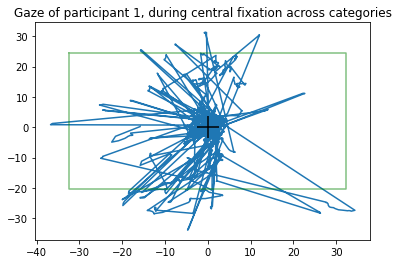

In [7]:
def plotPoints(p, color="green"):
    mus = np.array(p)
    plt.plot(mus[:,0], mus[:,1], color=color, alpha=0.5)

plt.figure()

#plt.scatter(offset[0], offset[1], color='red', zorder=2)
plt.scatter(0, 0, color='black', zorder=2, marker='+', s=500)

plt.plot(center_coords[1][:,0]-offset[0], center_coords[1][:,1]-offset[1], zorder=1)

# image area including all categories
plotPoints(test_points + [test_points[0]])
plt.title(f'Gaze of participant {participant}, during central fixation across categories')
plt.savefig(f'P{participant}_gaze_CF')
plt.show()

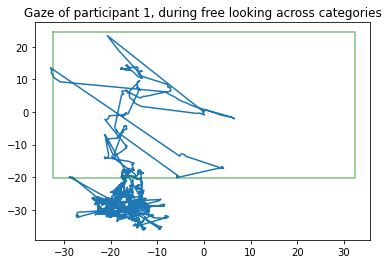

In [151]:
#print(free_coord)

plt.figure()


plt.plot(free_coord[:,0], free_coord[:,1], zorder=1)

# image area including all categories
plotPoints(test_points + [test_points[0]])
plt.title(f'Gaze of participant {participant}, during free looking across categories')
plt.savefig(f'P{participant}_gaze_fl')
plt.show()

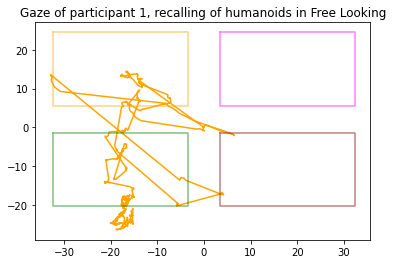

In [8]:
plt.figure()

option = 1

if option == 0:
    # set category
    coord = hum_coord
    plt.plot(coord[:,0], coord[:,1], color='orange')

if option == 1:
    coords = [hum_coord, thi_coord, veh_coord, ani_coord]
    c = ['orange', 'magenta', 'green', 'maroon']
    i = 0
    for elm in coords:
        plt.plot(elm[:,0], elm[:,1], color=c[i])
        i+=1



    
#plotPoints(test_points) 


# category areas
plotPoints(humanoids_points + [humanoids_points[0]], 'orange')
plotPoints(things_points + [things_points[0]], 'magenta')
plotPoints(vehicles_points + [vehicles_points[0]], 'green')
plotPoints(animals_points + [animals_points[0]], 'maroon')


plt.legend(["Gaze: Humanoid","Gaze: Things", "Gaze: Vehicles", "Gaze: Animals", "Category: Humanoid", "Category: Things", "Category: Vehicles", "Category: Animals"], loc=(1.02, 0.3))

if option == 0:
    plt.title(f"Gaze of participant {participant}, recalling of humanoids in Free Looking")
    plt.savefig(f'P{participant}_gaze_hum_free')

if option == 1:
    plt.title(f"Gaze of participant {participant}, recalling in Free Looking")
    plt.savefig(f'P{participant}_gaze_free')

plt.show()

13797
Category: HUMANOIDS, Participant: 1
False: 2733
True: 408
Percentage of looks-to-nothing: 0.12997769990442817


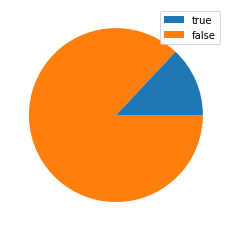

Category: THINGS, Participant: 1
False: 3175
True: 1
Percentage of looks-to-nothing: 0.000315059861373661


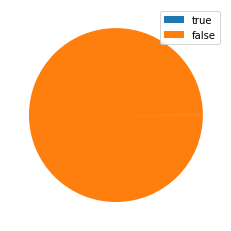

Category: VEHICLES, Participant: 1
False: 3535
True: 1
Percentage of looks-to-nothing: 0.0002829654782116582


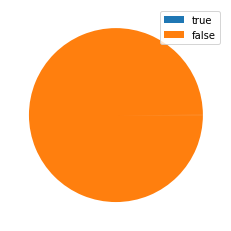

Category: ANIMALS, Participant: 1
False: 3949
True: 1
Percentage of looks-to-nothing: 0.00025329280648429586


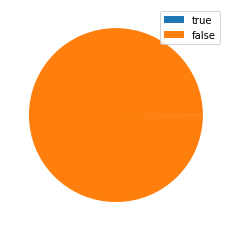

Category: All Categories, Participant: 1
False: 11421
True: 2378
Percentage of looks-to-nothing: 0.1723563093426107


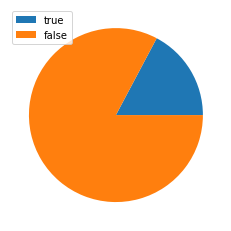

Category: all, excluding critical, Participant: 1
False: 11832.0
True: 1967.0
Percentage of looks-to-nothing: 0.14256722475900557


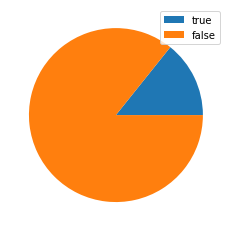

In [153]:

is_LtN = [hum_is_LtN, thi_is_LtN, veh_is_LtN, ani_is_LtN, all_is_LtN]

print(len(all_is_LtN))

gazes = [hum_gaze, thi_gaze, veh_gaze, ani_gaze, fl_gaze]

cats = cats + ["All Categories"]

def hit_rate(cat, gazes):
    print(f'Category: {cats[cat]}, Participant: {participant}')

    false_gazes= np.array([[0.,0.,0.]])
    true_gazes= np.array([[0.,0.,0.]])
    for i in range(len(is_LtN[cat])):
        if (not is_LtN[cat][i]):
            false_gazes = np.append(false_gazes, [gazes[cat][i]], axis=0)
        else: 
            true_gazes = np.append(true_gazes, [gazes[cat][i]], axis=0)
    #print(false_gazes) 
    #print(false_gazes[:,1])
    print(f"False: {len(false_gazes)}")
    print(f"True: {len(true_gazes)}")
    print(f"Percentage of looks-to-nothing: {len(true_gazes) / len(is_LtN[cat])}")


    # y angle
    #plt.hist(false_gazes[:,1])
    #plt.hist(true_gazes[:,1])

    # x angle
    #plt.hist(false_gazes[:,0])
    #plt.hist(true_gazes[:,0])



    plt.pie([len(true_gazes),len(false_gazes)])
    plt.legend(["true","false"])
    plt.show()
    
    return np.array([len(false_gazes), len(true_gazes)])


cat_hits = np.zeros((4,2))

for i in range(4):
    cat_hits[i] = hit_rate(i, gazes)    

    
# find and plot hits to canvas excluding critical category
full_total = hit_rate(4, gazes)
disp = np.sum(cat_hits[:,1])

print(f'Category: all, excluding critical, Participant: {participant}')
other_cats = [full_total[0]+disp, full_total[1]-disp]
print(f"False: {other_cats[0]}")
print(f"True: {other_cats[1]}")
print(f"Percentage of looks-to-nothing: {other_cats[1] / len(is_LtN[4])}")

plt.pie([other_cats[1],other_cats[0]])
plt.legend(["true","false"])
plt.show()


In [26]:
np.zeros((4,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

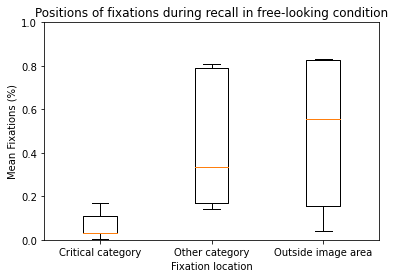

In [145]:
fix_NOT_critical = np.array([1967,
                            10742,
                            11760,
                            5989,
                            452])

fix_critical = np.array([411,
                        444,
                        2543,
                        1915,
                        4])

fix_outside = np.array([11421,
                        2063,
                        612,
                        9926,
                        2246])

total = np.zeros((5))

for i in range(len(total)):
    total[i] = fix_NOT_critical[i] + fix_critical[i] + fix_outside[i]


plt.boxplot([fix_critical/total, fix_NOT_critical/total, fix_outside/total], labels=['Critical category', 'Other category', 'Outside image area'])
plt.title('Positions of fixations during recall in free-looking condition')
plt.ylabel('Mean Fixations (%)')
plt.xlabel('Fixation location')
plt.ylim([0.,1.])
plt.savefig('Fixation_positions_free')